# Quantifying collapse of marine biodiversity in the Eastern Mediterranean sea

Here we use data from [Albano et al.](https://doi.org/10.1098/rspb.2020.2469) to illustrate the problem of uncertainty quantification in biodiversity measurement. In this study, the diversity of sampled mollusc species currently alive was compared to those found in surficial dead assemblages to assess how global warming changes species distributions.

We find that the loss of biodiversity is statistically significant. Our rigorous statistical approach supports the findings of the original study, not just in aggregate but at each individual site.

The data on molluscs found on hard substrates is used for illustration purposes, and included in the `data` folder for completeness. Full data on other sampling areas is available on [Dryad](https://datadryad.org/stash/dataset/doi:10.5061/dryad.pnvx0k6kk) under a cc0 license.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pydiver import *

plt.style.use('estimator.mplstyle')

In [2]:
df = pd.read_csv('data/molluscs.csv', index_col=0)
# Exclude invasive species
df = df[df['Alien']=='No']
df.head()

,Code,Class,Family,Genus,Species,Alien,Ash_12_L,Ash_25_L,Akh_12_L,Akh_20_L,Ash_12_D,Ash_25_D,Akh_12_D,Akh_20_D
1,B002,Bivalvia,Donacidae,Donax,semistriatus,No,0,0,0,0,22,6,0,1
2,B004,Bivalvia,Corbulidae,Corbula,gibba,No,0,2,0,0,3,114,0,3
3,B005,Bivalvia,Semelidae,Abra,alba,No,19,116,0,14,1,22,0,0
4,B006,Bivalvia,Thraciidae,Thracia,phaseolina,No,0,0,0,0,0,1,0,0
8,B013,Bivalvia,Veneridae,Dosinia,lupinus,No,0,0,0,0,2,2,0,2


In [3]:
dfpc = df.iloc[:, 6:].agg(pc, axis='index')

In [4]:
dfN = df.iloc[:, 6:].agg(sum, axis='index')

In [9]:
dfvarpc = df.iloc[:, 6:].agg(lambda x: varpc(x, method='unbiased'), axis='index')

In [10]:
dfvarpc_chao = df.iloc[:, 6:].agg(lambda x: varpc(x, method='chao'), axis='index')

In [12]:
dfvarpc_plugin = df.iloc[:, 6:].agg(lambda x: varpc(x, method='plugin'), axis='index')

In [13]:
pcs = pd.DataFrame(dict(pc=dfpc,
                        varpc=dfvarpc, stdpc=dfvarpc**.5,
                        varpc_chao=dfvarpc_chao, stdpc_chao=dfvarpc_chao**.5,
                        varpc_plugin=dfvarpc_plugin, stdpc_plugin=dfvarpc_plugin**.5,
                        N=dfN)).transpose()
pcs

,Ash_12_L,Ash_25_L,Akh_12_L,Akh_20_L,Ash_12_D,Ash_25_D,Akh_12_D,Akh_20_D
pc,0.160114,0.316039,0.148760,0.183571,0.108314,0.097393,0.112957,0.073451
varpc,0.000161,0.000018,0.000095,0.000156,0.000048,0.000076,0.000384,0.000044
stdpc,0.012678,0.004217,0.009760,0.012497,0.006926,0.008728,0.019603,0.006653
varpc_chao,0.000183,0.000018,0.000111,0.000155,0.000039,0.000078,0.000445,0.000044
stdpc_chao,0.013544,0.004258,0.010519,0.012451,0.006256,0.008852,0.021086,0.006658
varpc_plugin,0.000162,0.000018,0.000095,0.000156,0.000049,0.000077,0.000397,0.000044
stdpc_plugin,0.012719,0.004219,0.009763,0.012484,0.007002,0.008758,0.019927,0.006663
N,362.000000,4690.000000,720.000000,710.000000,469.000000,457.000000,104.000000,680.000000


Note that for this dataset different estimators of variance are similar to each other, in contrast to what we find in other examples.

In [15]:
sites = pcs.columns.str[:-2].unique()
for i, site in enumerate(sites):
    pcs_site = pcs[[f'{site}_L', f'{site}_D']]

/tmp/ipykernel_28984/3899530103.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


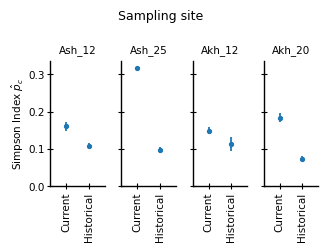

In [17]:
sites = pcs.columns.str[:-2].unique()
fig, axes = plt.subplots(figsize=(3.42, 2.5), ncols=len(sites), sharex=True, sharey=True)
ymax = pcs.loc['pc'].max()+0.02
for i, site in enumerate(sites):
    pcs_site = pcs[[f'{site}_L', f'{site}_D']]
    axes[i].errorbar([f'Current', f'Historical'],
                     pcs_site.loc['pc'], pcs_site.loc['stdpc'], fmt='o', ms=3)
    axes[i].set_ylim(0, ymax)
    axes[i].set_xlim(-0.7, 1.7)
    axes[i].set_title(f'{site}', fontsize='small')
axes[0].set_ylabel('Simpson Index $\hat p_c$', size='small')
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.suptitle('Sampling site')
fig.tight_layout()

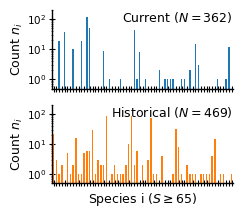

In [32]:
site = 'Ash_12'
df_site = df[df[[f'{site}_L', f'{site}_D']].sum(axis=1)>0].copy()
df_site['Name'] = df_site['Genus'] + ' ' + df_site['Species']
df_site.set_index('Name', inplace=True)
fig, axes = plt.subplots(figsize=(2.5, 2.25), nrows=2, sharex=True, sharey=True)
df_site['Ash_12_L'].plot(kind='bar', ax=axes[0], color='C0')
axes[0].text(1, 1, f"Current ($N={df_site[f'{site}_L'].sum()}$)",
             transform=axes[0].transAxes, va='top', ha='right')
df_site['Ash_12_D'].plot(kind='bar', ax=axes[1], color='C1')
axes[1].text(1, 1, f"Historical ($N={df_site[f'{site}_D'].sum()}$)",
             transform=axes[1].transAxes, va='top', ha='right')
axes[0].set_yscale('log')
axes[0].set_ylim(0.5e0, 2e2)
axes[1].set_xticklabels('')
axes[1].set_xlabel(f'Species i ($S \geq {len(df_site)}$)')
for ax in axes:
    ax.set_ylabel('Count $n_i$')
fig.tight_layout()

Distributions of sampled mollusc species currently alive (top) and found in surficial dead assemblages (bottom).

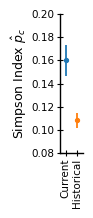

In [30]:
fig, ax = plt.subplots(figsize=(1.0, 2.25), ncols=1, sharex=True, sharey=True)
pcs_site = pcs[[f'{site}_L', f'{site}_D']]
ax.errorbar([0.0],
            [pcs_site.loc['pc'].iloc[0]], [pcs_site.loc['stdpc_chao'].iloc[0]],
            color='C0',
            fmt='o', ms=3)
ax.errorbar([1.0],
            [pcs_site.loc['pc'].iloc[1]], [pcs_site.loc['stdpc_chao'].iloc[1]],
            color='C1',
            fmt='o', ms=3)
ax.set_ylabel('Simpson Index $\hat p_c$')
ax.set_xticks([0.0, 1.0])
ax.set_xticklabels([f'Current', f'Historical'], rotation=90)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0.08, 0.2)
fig.tight_layout()

Simpson Diversity index with error bars calculated using the unbiased estimator.